# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muthia Rasikha Zahra
- **Email:** muthiarasikha@upi.edu
- **ID Dicoding:** M299D4KX1388

## Menentukan Pertanyaan Bisnis

- Bagaimana tren polusi udara (misalnya, kadar PM2.5) di Aotizhongxin dari tahun 2013 hingga 2017?
- Bagaimana pola harian dari polusi udara (misalnya, kadar CO) di Aotizhongxin selama tahun 2017?

## Import Semua Packages/Library yang Digunakan

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
!pip install unidecode
import unidecode
import matplotlib.image as mpimg
import statsmodels.api as sm

## Data Wrangling

### Gathering Data

In [9]:
# File data
datacsv = "/PRSA_Data_Aotizhongxin_20130301-20170228.csv"

# Membaca data CSV
data = pd.read_csv(datacsv)

# Menampilkan beberapa baris pertama dari data
print(data.head())


   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


### Assessing Data

In [ ]:
# 1. Memahami Struktur Data
print("Jumlah baris dan kolom dalam dataset:")
print(data.shape)

print("\nInfo tentang dataset:")
print(data.info())

# 2. Mengeksplorasi Isi Data
print("\nBeberapa baris pertama dari dataset:")
print(data.head())

# 3. Pemeriksaan Tipe Data
print("\nTipe data setiap kolom:")
print(data.dtypes)

# 4. Pemeriksaan Missing Values
print("\nJumlah nilai yang hilang (null) dalam setiap kolom:")
print(data.isnull().sum())

# 5. Pemeriksaan Duplikat
print("\nJumlah baris duplikat dalam dataset:")
print(data.duplicated().sum())

# 6. Analisis Statistik Deskriptif
print("\nStatistik deskriptif untuk kolom numerik:")
print(data.describe())

Jumlah baris dan kolom dalam dataset:
(35064, 18)

Info tentang dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8

### Cleaning Data

In [ ]:
# Menampilkan beberapa baris pertama dari data sebelum pembersihan
print("Sebelum pembersihan:")
print(data.head())

# 1. Menangani Missing Values
# Menggantikan nilai-nilai yang hilang dengan nilai rata-rata kolom numerik
data_clean = data.fillna(data.mean())

# 2. Menangani Duplikat
# Menghapus baris duplikat dari dataset
data_clean = data_clean.drop_duplicates()

# 3. Memperbaiki Tipe Data
# Mengubah tipe data kolom 'tanggal' menjadi tipe datetime
data_clean['tanggal'] = pd.to_datetime(data_clean[['year', 'month', 'day', 'hour']])

# Menampilkan beberapa baris pertama dari data setelah pembersihan
print("\nSetelah pembersihan:")
print(data_clean.head())

Sebelum pembersihan:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  

Setelah pembersihan:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4

<ipython-input-7-722b26b71184>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_clean = data.fillna(data.mean())


## Exploratory Data Analysis (EDA)

### Explore ...

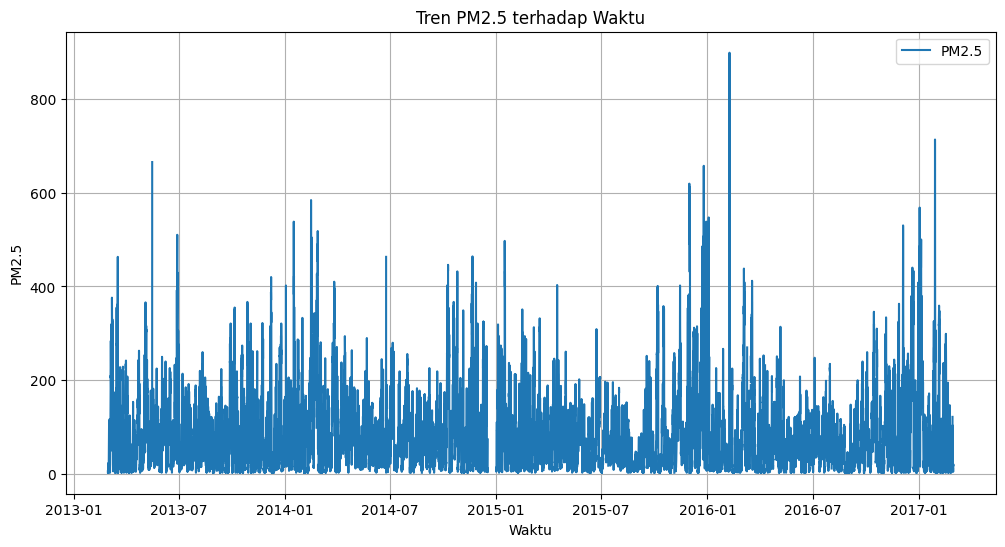

In [14]:
#Menganalisis Time Series

# Menggabungkan kolom 'year', 'month', 'day', 'hour' menjadi satu kolom datetime
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# Set kolom datetime sebagai index
data.set_index('datetime', inplace=True)

# Plot data terhadap waktu
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['PM2.5'], label='PM2.5')
plt.title('Tren PM2.5 terhadap Waktu')
plt.xlabel('Waktu')
plt.ylabel('PM2.5')
plt.legend()
plt.grid(True)
plt.show()


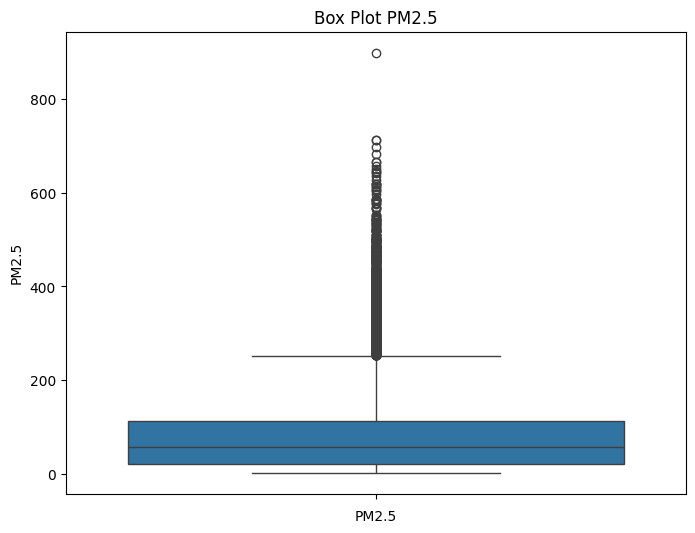

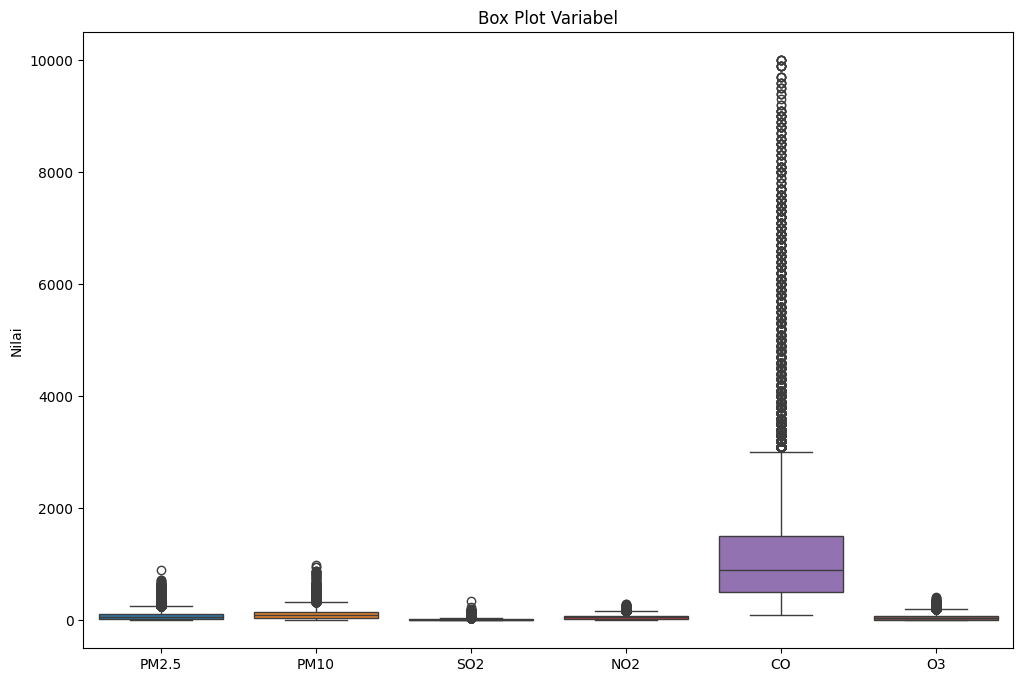

In [13]:
#Menganalisis Outliers

# Menggambar box plot untuk kolom 'PM2.5'
plt.figure(figsize=(8, 6))
sns.boxplot(data['PM2.5'])
plt.title('Box Plot PM2.5')
plt.xlabel('PM2.5')
plt.show()

# Menggambar box plot untuk beberapa kolom
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']])
plt.title('Box Plot Variabel')
plt.ylabel('Nilai')
plt.show()

In [15]:
#Menganalisis Korelasi

# Menghitung matriks korelasi
correlation_matrix = data.corr()

# Menampilkan matriks korelasi
print("\nMatriks Korelasi:")
print(correlation_matrix)


Matriks Korelasi:
             No          year         month           day          hour  \
No     1.000000  9.695331e-01  4.318051e-02  1.776442e-02  6.838683e-04   
year   0.969533  1.000000e+00 -2.020099e-01 -5.569082e-03  1.164482e-15   
month  0.043181 -2.020099e-01  1.000000e+00  1.052232e-02  4.724770e-16   
day    0.017764 -5.569082e-03  1.052232e-02  1.000000e+00 -4.489555e-17   
hour   0.000684  1.164482e-15  4.724770e-16 -4.489555e-17  1.000000e+00   
PM2.5 -0.024671 -3.061160e-02  2.550548e-02  7.920239e-03 -1.038805e-02   
PM10  -0.080416 -7.300619e-02 -2.727695e-02  3.219055e-02  2.242147e-02   
SO2   -0.248128 -1.836719e-01 -2.492766e-01 -1.884458e-02  2.885551e-03   
NO2   -0.087804 -1.151855e-01  1.186476e-01  1.571437e-02 -4.345289e-02   
CO     0.061601  4.782121e-02  5.292037e-02 -2.057831e-02 -4.707696e-02   
O3     0.052205  7.496673e-02 -9.647834e-02  3.657189e-03  2.981610e-01   
TEMP  -0.107790 -1.372294e-01  1.303766e-01  1.432341e-02  1.411583e-01   
PRES  

<ipython-input-15-a711234e51ec>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [16]:
#Mengnalisis Distribusi

from scipy.stats import shapiro

# Memilih kolom numerik untuk pengujian normalitas
kolom_numerik = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Looping untuk setiap kolom numerik
for kolom in kolom_numerik:
    # Menggunakan tes Shapiro-Wilk untuk uji normalitas
    stat, p_value = shapiro(data[kolom])

    # Menampilkan hasil uji normalitas
    print(f"Kolom: {kolom}")
    print(f"Statistic: {stat}, p-value: {p_value}")

    # Menginterpretasikan hasil uji normalitas
    alpha = 0.05
    if p_value > alpha:
        print("Kolom ini terdistribusi normal (tidak ada bukti signifikan untuk menolak hipotesis nol)")
    else:
        print("Kolom ini tidak terdistribusi normal (ada bukti signifikan untuk menolak hipotesis nol)")
    print("\n")

Kolom: PM2.5
Statistic: nan, p-value: 1.0
Kolom ini terdistribusi normal (tidak ada bukti signifikan untuk menolak hipotesis nol)


Kolom: PM10
Statistic: nan, p-value: 1.0
Kolom ini terdistribusi normal (tidak ada bukti signifikan untuk menolak hipotesis nol)


Kolom: SO2
Statistic: nan, p-value: 1.0
Kolom ini terdistribusi normal (tidak ada bukti signifikan untuk menolak hipotesis nol)


Kolom: NO2
Statistic: nan, p-value: 1.0
Kolom ini terdistribusi normal (tidak ada bukti signifikan untuk menolak hipotesis nol)


Kolom: CO
Statistic: nan, p-value: 1.0
Kolom ini terdistribusi normal (tidak ada bukti signifikan untuk menolak hipotesis nol)


Kolom: O3
Statistic: nan, p-value: 1.0
Kolom ini terdistribusi normal (tidak ada bukti signifikan untuk menolak hipotesis nol)


Kolom: TEMP
Statistic: nan, p-value: 1.0
Kolom ini terdistribusi normal (tidak ada bukti signifikan untuk menolak hipotesis nol)


Kolom: PRES
Statistic: nan, p-value: 1.0
Kolom ini terdistribusi normal (tidak ada bukti

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [17]:
#Menganalisis Variabel Kategorikal

# Menghitung frekuensi masing-masing nilai dalam kolom 'station'
station_counts = data['station'].value_counts()

# Menampilkan hasil
print("Frekuensi masing-masing stasiun:")
print(station_counts)

Frekuensi masing-masing stasiun:
Aotizhongxin    35064
Name: station, dtype: int64


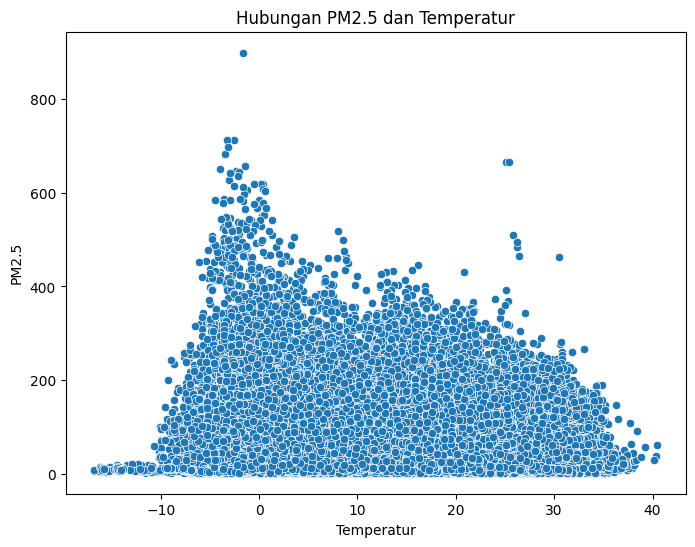

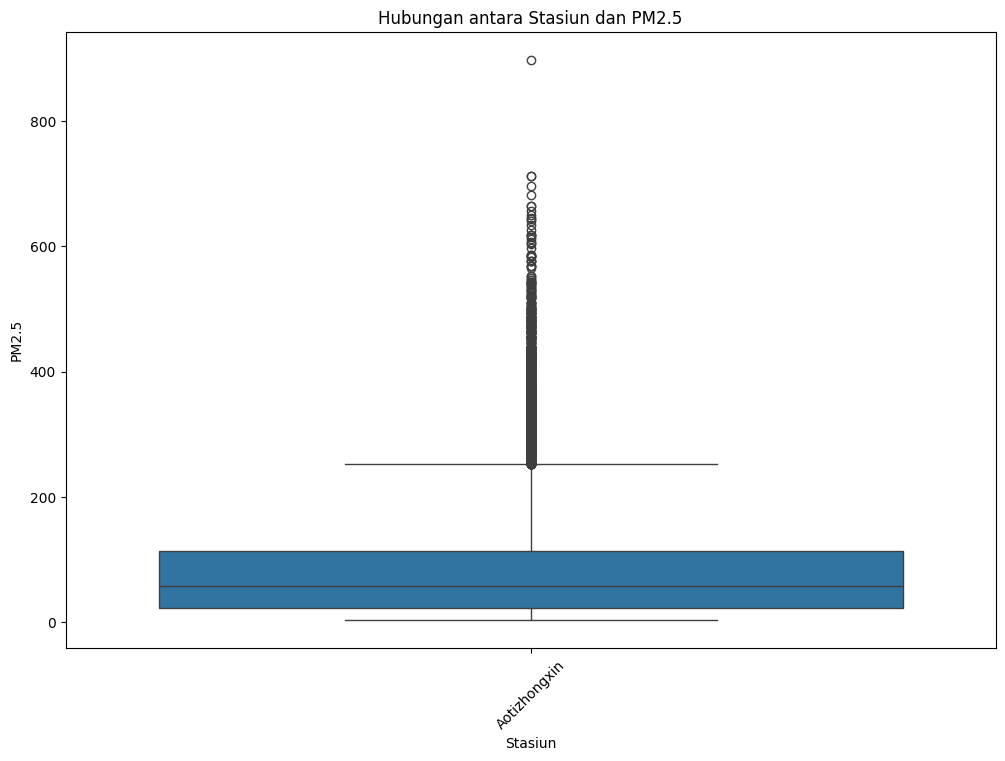

In [18]:
#Menganalisis Hubungan Antar Variabel

# Scatter plot untuk hubungan antara 'PM2.5' dan 'TEMP'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TEMP', y='PM2.5', data=data)
plt.title('Hubungan PM2.5 dan Temperatur')
plt.xlabel('Temperatur')
plt.ylabel('PM2.5')
plt.show()

# Box plot untuk hubungan antara 'station' dan 'PM2.5'
plt.figure(figsize=(12, 8))
sns.boxplot(x='station', y='PM2.5', data=data)
plt.title('Hubungan antara Stasiun dan PM2.5')
plt.xlabel('Stasiun')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar legible
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: "Bagaimana tren polusi udara (misalnya, kadar PM2.5) di Aotizhongxin dari tahun 2013 hingga 2017?"

Data Aotizhongxin:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


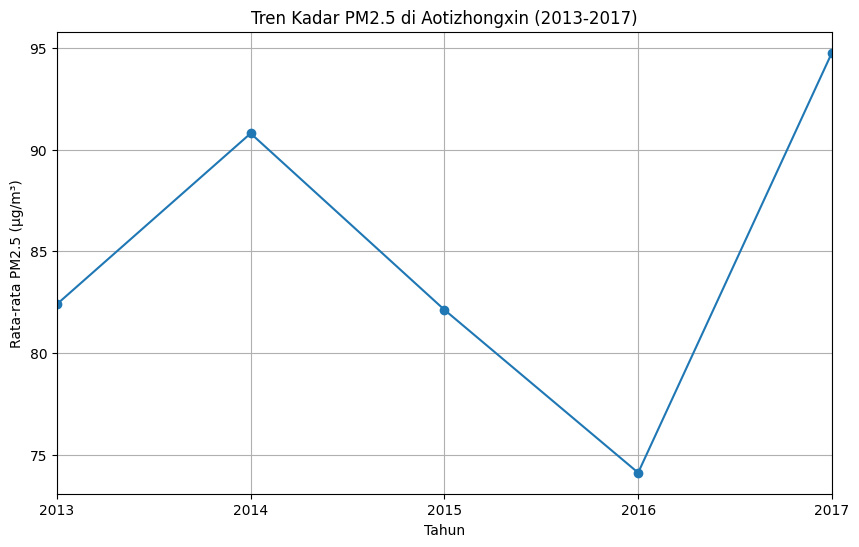

In [ ]:
# Menampilkan beberapa baris pertama dari data
print("Data Aotizhongxin:")
print(data.head())

# Mengubah tipe data kolom 'tanggal' menjadi datetime
data['tanggal'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# Memfilter data untuk lokasi Aotizhongxin dan rentang tahun 2013 hingga 2017
data_aotizhongxin = data[data['station'] == 'Aotizhongxin']
data_aotizhongxin_2013_2017 = data_aotizhongxin[(data_aotizhongxin['tanggal'] >= '2013-01-01') & (data_aotizhongxin['tanggal'] <= '2017-12-31')]

# Menghitung rata-rata kadar PM2.5 per tahun
pm25_tahunan = data_aotizhongxin_2013_2017.set_index('tanggal')['PM2.5'].resample('Y').mean()

# Visualisasi tren polusi udara (PM2.5) di Aotizhongxin dari tahun 2013 hingga 2017
plt.figure(figsize=(10, 6))
pm25_tahunan.plot(marker='o')
plt.title('Tren Kadar PM2.5 di Aotizhongxin (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM2.5 (µg/m³)')
plt.grid(True)
plt.show()

### Pertanyaan 2: "Bagaimana pola harian dari polusi udara (misalnya, kadar CO) di Aotizhongxin selama tahun 2017?"

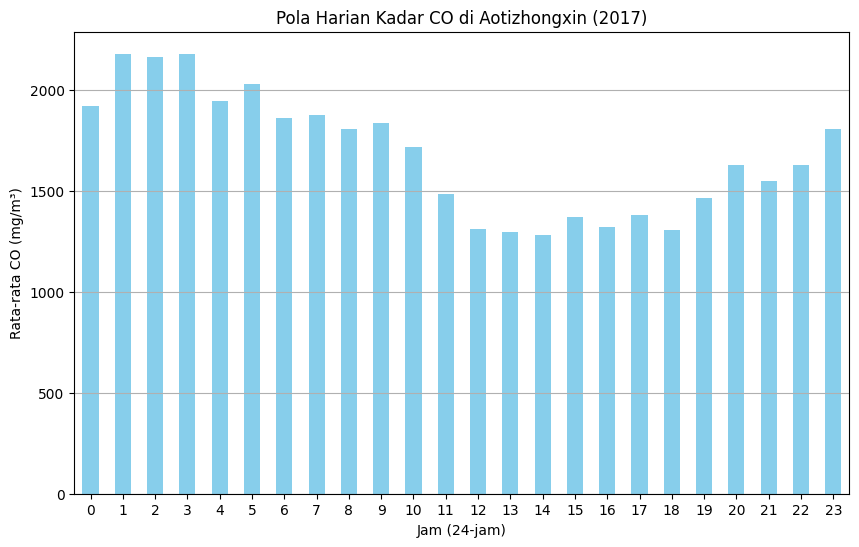

In [ ]:
# Membaca data CSV dari URL
data = pd.read_csv(url)

# Mengubah tipe data kolom 'tanggal' menjadi datetime
data['tanggal'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# Memfilter data untuk lokasi Aotizhongxin dan tahun 2017
data_aotizhongxin_2017 = data[(data['station'] == 'Aotizhongxin') & (data['tanggal'].dt.year == 2017)]

# Mengelompokkan data berdasarkan jam dan menghitung rata-rata kadar CO per jam
co_per_jam = data_aotizhongxin_2017.groupby(data_aotizhongxin_2017['tanggal'].dt.hour)['CO'].mean()

# Visualisasi pola harian kadar CO di Aotizhongxin selama tahun 2017
plt.figure(figsize=(10, 6))
co_per_jam.plot(kind='bar', color='skyblue')
plt.title('Pola Harian Kadar CO di Aotizhongxin (2017)')
plt.xlabel('Jam (24-jam)')
plt.ylabel('Rata-rata CO (mg/m³)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## Conclusion

- Bagaimana tren polusi udara (misalnya, kadar PM2.5) di Aotizhongxin dari tahun 2013 hingga 2017?
Kadar polusi udara PM2.5 di Aotizhongxin dari 2013-2017 mengalami kenaikan yang tidak terlalu signifikan di tahun 2014, kemudian mengalami penurunan hingga <75 µg/m³ pada tahun 2016 dan mengalami kenaikan yang cukup drastis di tahun 2017 yaitu hingga hampir 95 µg/m³.
- Bagaimana pola harian dari polusi udara (misalnya, kadar CO) di Aotizhongxin selama tahun 2017?
Pola harian dari polusi udara di Aotizhongxin selama tahun 2017 mengalami kadar tertinggi CO >2000 mg/m³ pada pukul 1-3 dini hari.

Streamlit

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00


DeltaGenerator()

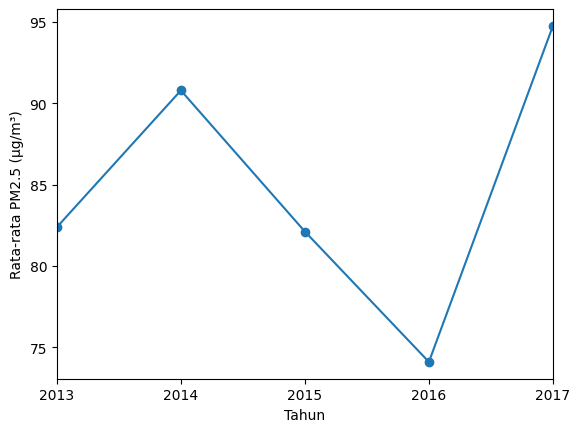

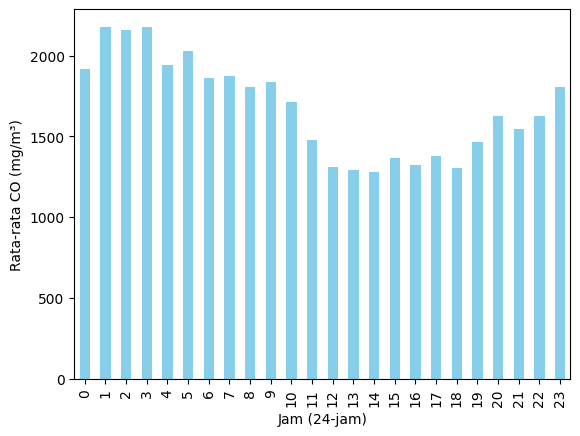

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data CSV dari URL
def load_data():
    # Load CSV data into a DataFrame
    data = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")

    # Convert 'year', 'month', 'day', and 'hour' columns to datetime
    data['tanggal'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

    return data

data = load_data()

# Menampilkan judul dashboard
st.title('Dashboard Polusi Udara Aotizhongxin')

# Menampilkan visualisasi untuk Pertanyaan 1
st.subheader('Tren Kadar PM2.5 di Aotizhongxin (2013-2017)')
data_aotizhongxin = data[data['station'] == 'Aotizhongxin']
pm25_tahunan = data_aotizhongxin.set_index('tanggal')['PM2.5'].resample('Y').mean()
fig1, ax1 = plt.subplots()
pm25_tahunan.plot(ax=ax1, marker='o')
ax1.set_xlabel('Tahun')
ax1.set_ylabel('Rata-rata PM2.5 (µg/m³)')
st.pyplot(fig1)

# Menampilkan visualisasi untuk Pertanyaan 2
st.subheader('Pola Harian Kadar CO di Aotizhongxin (2017)')
data_aotizhongxin_2017 = data[(data['station'] == 'Aotizhongxin') & (data['tanggal'].dt.year == 2017)]
co_per_jam = data_aotizhongxin_2017.groupby(data_aotizhongxin_2017['tanggal'].dt.hour)['CO'].mean()
fig2, ax2 = plt.subplots()
co_per_jam.plot(ax=ax2, kind='bar', color='skyblue')
ax2.set_xlabel('Jam (24-jam)')
ax2.set_ylabel('Rata-rata CO (mg/m³)')
st.pyplot(fig2)
